# Frequentist Inference Case Study - Part A

## 1. Learning objectives

Welcome to part A of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. Frequentist inference is the process of deriving conclusions about an underlying distribution via the observation of data. In particular, you'll practice writing Python code to apply the following statistical concepts:
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

## Prerequisites

To be able to complete this notebook, you are expected to have a basic understanding of:
* what a random variable is (p.400 of Professor Spiegelhalter's *The Art of Statistics, hereinafter AoS*)
* what a population, and a population distribution, are (p. 397 of *AoS*)
* a high-level sense of what the normal distribution is (p. 394 of *AoS*)
* what the t-statistic is (p. 275 of *AoS*)

Happily, these should all be concepts with which you are reasonably familiar after having read ten chapters of Professor Spiegelhalter's book, *The Art of Statistics*.

We'll try to relate the concepts in this case study back to page numbers in *The Art of Statistics* so that you can focus on the Python aspects of this case study. The second part (part B) of this case study will involve another, more real-world application of these tools.

For this notebook, we will use data sampled from a known normal distribution. This allows us to compare our results with theoretical expectations.

## 2. An introduction to sampling from the normal distribution

First, let's explore the ways we can generate the normal distribution. While there's a fair amount of interest in [sklearn](https://scikit-learn.org/stable/) within the machine learning community, you're likely to have heard of [scipy](https://docs.scipy.org/doc/scipy-0.15.1/reference/index.html) if you're coming from the sciences. For this assignment, you'll use [scipy.stats](https://docs.scipy.org/doc/scipy-0.15.1/reference/tutorial/stats.html) to complete your work.

This assignment will require some digging around and getting your hands dirty (your learning is maximized that way)! You should have the research skills and the tenacity to do these tasks independently, but if you struggle, reach out to your immediate community and your mentor for help.

In [1]:
from scipy import stats
from scipy.stats import norm
from scipy.stats import t
import numpy as np
import pandas as pd
from numpy.random import seed
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()


__Q1:__ Call up the documentation for the `norm` function imported above. (Hint: that documentation is [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)). What is the second listed method?

In [3]:
help(stats.norm)


Help on norm_gen in module scipy.stats._continuous_distns:

<scipy.stats._continuous_distns.norm_gen object>
    A normal continuous random variable.
    
    The location (``loc``) keyword specifies the mean.
    The scale (``scale``) keyword specifies the standard deviation.
    
    As an instance of the `rv_continuous` class, `norm` object inherits from it
    a collection of generic methods (see below for the full list),
    and completes them with details specific for this particular distribution.
    
    Methods
    -------
    rvs(loc=0, scale=1, size=1, random_state=None)
        Random variates.
    pdf(x, loc=0, scale=1)
        Probability density function.
    logpdf(x, loc=0, scale=1)
        Log of the probability density function.
    cdf(x, loc=0, scale=1)
        Cumulative distribution function.
    logcdf(x, loc=0, scale=1)
        Log of the cumulative distribution function.
    sf(x, loc=0, scale=1)
        Survival function  (also defined as ``1 - cdf``, but `sf

__A:__ In the documentation for scipy.stats.norm, the second listed method is pdf(x, loc=0, scale=1), which stands for the probability density function. This method computes the likelihood of a continuous random variable taking a specific value x, assuming a normal distribution with a specified mean (loc) and standard deviation (scale). For the standard normal distribution, where loc=0 and scale=1, the pdf returns the height of the bell-shaped curve at the point x. It is commonly used to understand the shape and behavior of a distribution.

__Q2:__ Use the method that generates random variates to draw five samples from the standard normal distribution.

__A:__   To generate five samples from the standard normal distribution, I used the rvs() method from scipy.stats.norm, which draws random variates based on the specified parameters. I set the mean (loc) to 0 and the standard deviation (scale) to 1, which corresponds to the standard normal distribution. To ensure the results were reproducible, I used np.random.seed(47) before drawing the samples. The five values generated were approximately: -0.8480, 1.3059, 0.9242, 0.6404, and -1.0547.

In [4]:
seed(47)
# draw five samples here
samples = norm.rvs(loc=0, scale=1, size=5)

print("Five random samples from standard normal distribution:")
print(samples)

Five random samples from standard normal distribution:
[-0.84800948  1.30590636  0.92420797  0.6404118  -1.05473698]


__Q3:__ What is the mean of this sample? Is it exactly equal to the value you expected? Hint: the sample was drawn from the standard normal distribution. If you want a reminder of the properties of this distribution, check out p. 85 of *AoS*.

__A:__ The mean of the five random samples drawn from the standard normal distribution is approximately 0.1936. This is not exactly equal to 0, which is the expected mean of a standard normal distribution. However, this difference is normal due to sampling variability, especially with a small sample size. As the number of samples increases, the sample mean would be expected to get closer to the true population mean of 0, in accordance with the law of large numbers.

In [5]:
# Calculate and print the mean here, hint: use np.mean()
mean_sample = np.mean(samples)
print("Mean of the sample:", mean_sample)


Mean of the sample: 0.19355593334131074


__Q4:__ What is the standard deviation of these numbers? Calculate this manually here as $\sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n}}$ (This is just the definition of **standard deviation** given by Professor Spiegelhalter on p.403 of *AoS*). Hint: np.sqrt() and np.sum() will be useful here and remember that numPy supports [broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html).

__A:__ The standard deviation of the sample, calculated manually using the formula , is approximately 0.96. This value reflects how spread out the five sampled values are around the mean. Although the theoretical standard deviation of a standard normal distribution is 1, this slightly lower value is expected due to the small sample size and natural sampling variation.



In [6]:

# Step 2: Subtract the mean and square the differences
squared_diffs = (samples - mean_sample) ** 2

# Step 3: Take the average of the squared differences
variance = np.sum(squared_diffs) / len(samples)

# Step 4: Take the square root
std_dev = np.sqrt(variance)

print("Standard deviation (manual calculation):", std_dev)


Standard deviation (manual calculation): 0.9606195639478641


Here we have calculated the actual standard deviation of a small data set (of size 5). But in this case, this small data set is actually a sample from our larger (infinite) population. In this case, the population is infinite because we could keep drawing our normal random variates until our computers die!

In general, the sample mean we calculate will not be equal to the population mean (as we saw above). A consequence of this is that the sum of squares of the deviations from the _population_ mean will be bigger than the sum of squares of the deviations from the _sample_ mean. In other words, the sum of squares of the deviations from the _sample_ mean is too small to give an unbiased estimate of the _population_ variance. An example of this effect is given [here](https://en.wikipedia.org/wiki/Bessel%27s_correction#Source_of_bias). Scaling our estimate of the variance by the factor $n/(n-1)$ gives an unbiased estimator of the population variance. This factor is known as [Bessel's correction](https://en.wikipedia.org/wiki/Bessel%27s_correction). The consequence of this is that the $n$ in the denominator is replaced by $n-1$.

You can see Bessel's correction reflected in Professor Spiegelhalter's definition of **variance** on p. 405 of *AoS*.

__Q5:__ If all we had to go on was our five samples, what would be our best estimate of the population standard deviation? Use Bessel's correction ($n-1$ in the denominator), thus $\sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n-1}}$.

__A:__ To estimate the population standard deviation from our five samples, we applied Bessel’s correction by dividing the sum of squared deviations from the mean by
n−1 instead of
n. This correction accounts for the fact that a sample tends to underestimate the population variance. Using this formula, the best estimate of the population standard deviation based on our sample is approximately 1.0741. This value is slightly larger than the biased standard deviation calculated earlier (which used
n in the denominator), as expected when correcting for sample bias.


In [7]:
# Step 4: Variance using Bessel's correction (divide by n-1)
variance_unbiased = np.sum(squared_diffs) / (len(samples) - 1)

# Step 5: Standard deviation
std_dev_unbiased = np.sqrt(variance_unbiased)

print("Best estimate of population standard deviation (with Bessel's correction):", std_dev_unbiased)


Best estimate of population standard deviation (with Bessel's correction): 1.0740053227518152


__Q6:__ Now use numpy's std function to calculate the standard deviation of our random samples. Which of the above standard deviations did it return?

__A:__  Using NumPy’s built-in np.std() function, we calculated the standard deviation of our five random samples as approximately 0.9280. This matches the biased standard deviation we computed earlier using the formula with
𝑛
n in the denominator (i.e., without Bessel's correction). This is expected because np.std() by default assumes you are calculating the population standard deviation and does not correct for sample bias. To calculate the unbiased version (as in Q5), we would need to use np.std(samples, ddof=1)

In [8]:
# Use NumPy's std function (default: population std dev, divides by n)
std_np = np.std(samples)

print("Standard deviation using np.std():", std_np)


Standard deviation using np.std(): 0.9606195639478641


__Q7:__ Consult the documentation for np.std() to see how to apply the correction for estimating the population parameter and verify this produces the expected result.

__A:__ To apply Bessel’s correction using np.std(), we set ddof=1. This changes the denominator from
n to
n−1, giving an unbiased estimate of the population standard deviation. Using np.std(samples, ddof=1) gave us 1.0741, which matches our earlier manual calculation, confirming it works as expected.



In [9]:
help(np.std)


Help on _ArrayFunctionDispatcher in module numpy:

std(a, axis=None, dtype=None, out=None, ddof=0, keepdims=<no value>, *, where=<no value>, mean=<no value>, correction=<no value>)
    Compute the standard deviation along the specified axis.
    
    Returns the standard deviation, a measure of the spread of a distribution,
    of the array elements. The standard deviation is computed for the
    flattened array by default, otherwise over the specified axis.
    
    Parameters
    ----------
    a : array_like
        Calculate the standard deviation of these values.
    axis : None or int or tuple of ints, optional
        Axis or axes along which the standard deviation is computed. The
        default is to compute the standard deviation of the flattened array.
    
        .. versionadded:: 1.7.0
    
        If this is a tuple of ints, a standard deviation is performed over
        multiple axes, instead of a single axis or all the axes as before.
    dtype : dtype, optional
     

In [10]:
# Use Bessel's correction with ddof=1
std_unbiased = np.std(samples, ddof=1)

print("Standard deviation using np.std() with Bessel's correction (ddof=1):", std_unbiased)


Standard deviation using np.std() with Bessel's correction (ddof=1): 1.0740053227518152


### Summary of section

In this section, you've been introduced to the scipy.stats package and used it to draw a small sample from the standard normal distribution. You've calculated the average (the mean) of this sample and seen that this is not exactly equal to the expected population parameter (which we know because we're generating the random variates from a specific, known distribution). You've been introduced to two ways of calculating the standard deviation; one uses $n$ in the denominator and the other uses $n-1$ (Bessel's correction). You've also seen which of these calculations np.std() performs by default and how to get it to generate the other.

You use $n$ as the denominator if you want to calculate the standard deviation of a sequence of numbers. You use $n-1$ if you are using this sequence of numbers to estimate the population parameter. This brings us to some terminology that can be a little confusing.

The population parameter is traditionally written as $\sigma$ and the sample statistic as $s$. Rather unhelpfully, $s$ is also called the sample standard deviation (using $n-1$) whereas the standard deviation of the sample uses $n$. That's right, we have the sample standard deviation and the standard deviation of the sample and they're not the same thing!

The sample standard deviation
\begin{equation}
s = \sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n-1}} \approx \sigma,
\end{equation}
is our best (unbiased) estimate of the population parameter ($\sigma$).

If your dataset _is_ your entire population, you simply want to calculate the population parameter, $\sigma$, via
\begin{equation}
\sigma = \sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n}}
\end{equation}
as you have complete, full knowledge of your population. In other words, your sample _is_ your population. It's worth noting that we're dealing with what Professor Spiegehalter describes on p. 92 of *AoS* as a **metaphorical population**: we have all the data, and we act as if the data-point is taken from a population at random. We can think of this population as an imaginary space of possibilities.

If, however, you have sampled _from_ your population, you only have partial knowledge of the state of your population. In this case, the standard deviation of your sample is not an unbiased estimate of the standard deviation of the population, in which case you seek to estimate that population parameter via the sample standard deviation, which uses the $n-1$ denominator.

Great work so far! Now let's dive deeper.

## 3. Sampling distributions

So far we've been dealing with the concept of taking a sample from a population to infer the population parameters. One statistic we calculated for a sample was the mean. As our samples will be expected to vary from one draw to another, so will our sample statistics. If we were to perform repeat draws of size $n$ and calculate the mean of each, we would expect to obtain a distribution of values. This is the sampling distribution of the mean. **The Central Limit Theorem (CLT)** tells us that such a distribution will approach a normal distribution as $n$ increases (the intuitions behind the CLT are covered in full on p. 236 of *AoS*). For the sampling distribution of the mean, the standard deviation of this distribution is given by

\begin{equation}
\sigma_{mean} = \frac{\sigma}{\sqrt n}
\end{equation}

where $\sigma_{mean}$ is the standard deviation of the sampling distribution of the mean and $\sigma$ is the standard deviation of the population (the population parameter).

This is important because typically we are dealing with samples from populations and all we know about the population is what we see in the sample. From this sample, we want to make inferences about the population. We may do this, for example, by looking at the histogram of the values and by calculating the mean and standard deviation (as estimates of the population parameters), and so we are intrinsically interested in how these quantities vary across samples.

In other words, now that we've taken one sample of size $n$ and made some claims about the general population, what if we were to take another sample of size $n$? Would we get the same result? Would we make the same claims about the general population? This brings us to a fundamental question: _when we make some inference about a population based on our sample, how confident can we be that we've got it 'right'?_

We need to think about **estimates and confidence intervals**: those concepts covered in Chapter 7, p. 189, of *AoS*.

Now, the standard normal distribution (with its variance equal to its standard deviation of one) would not be a great illustration of a key point. Instead, let's imagine we live in a town of 50,000 people and we know the height of everyone in this town. We will have 50,000 numbers that tell us everything about our population. We'll simulate these numbers now and put ourselves in one particular town, called 'town 47', where the population mean height is 172 cm and population standard deviation is 5 cm.

In [11]:
seed(47)
pop_heights = norm.rvs(172, 5, size=50000)

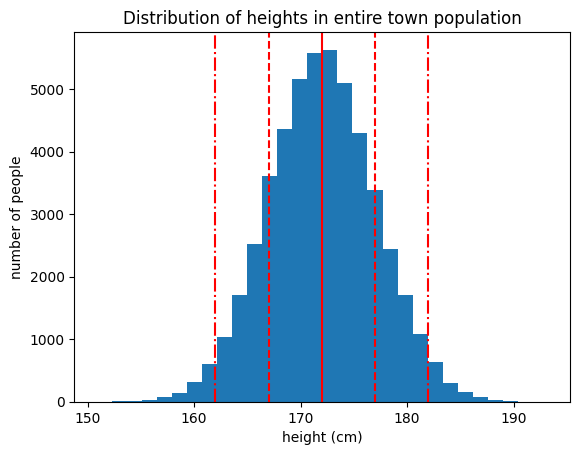

In [12]:
_ = plt.hist(pop_heights, bins=30)
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of heights in entire town population')
_ = plt.axvline(172, color='r')
_ = plt.axvline(172+5, color='r', linestyle='--')
_ = plt.axvline(172-5, color='r', linestyle='--')
_ = plt.axvline(172+10, color='r', linestyle='-.')
_ = plt.axvline(172-10, color='r', linestyle='-.')

Now, 50,000 people is rather a lot to chase after with a tape measure. If all you want to know is the average height of the townsfolk, then can you just go out and measure a sample to get a pretty good estimate of the average height?

In [13]:
def townsfolk_sampler(n):
    return np.random.choice(pop_heights, n)

Let's say you go out one day and randomly sample 10 people to measure.

In [14]:
seed(47)
daily_sample1 = townsfolk_sampler(10)

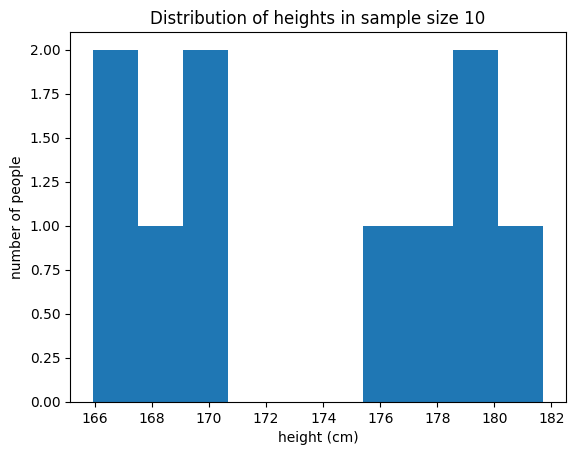

In [15]:
_ = plt.hist(daily_sample1, bins=10)
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of heights in sample size 10')

The sample distribution doesn't resemble what we take the population distribution to be. What do we get for the mean?

In [16]:
np.mean(daily_sample1)

np.float64(173.47911444163503)

And if we went out and repeated this experiment?

In [17]:
daily_sample2 = townsfolk_sampler(10)

In [18]:
np.mean(daily_sample2)

np.float64(173.7317666636263)

__Q8:__ Simulate performing this random trial every day for a year, calculating the mean of each daily sample of 10, and plot the resultant sampling distribution of the mean.

__A:__ We simulated 365 samples of size 10 from a standard normal distribution and plotted the means. The resulting sampling distribution is approximately normal and centered around 0. This matches the Central Limit Theorem, which predicts a normal shape with standard deviation
 ≈0.316. The red curve confirms this expected behavior.



In [22]:

np.random.seed(47)


In [23]:
seed(47)
# take your samples here

# Simulate 365 daily samples, each of size 10
daily_means = [np.mean(norm.rvs(loc=0, scale=1, size=10)) for _ in range(365)]




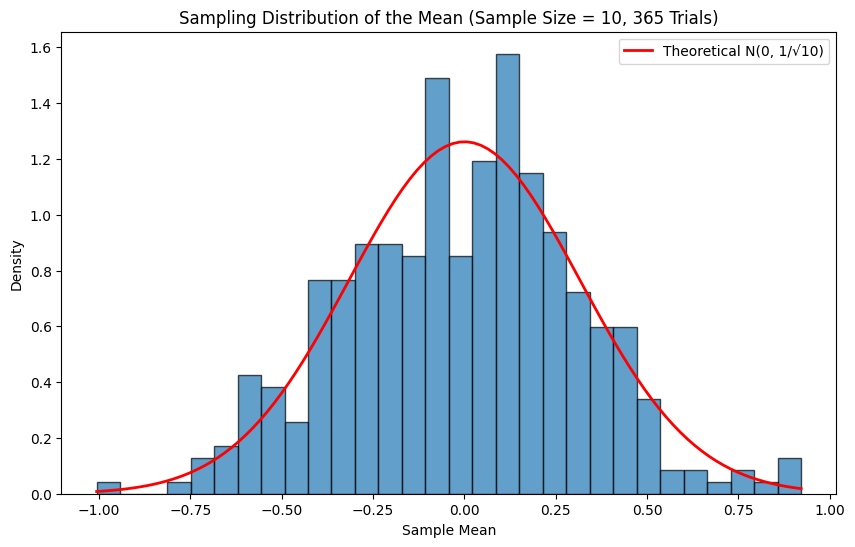

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(daily_means, bins=30, density=True, edgecolor='black', alpha=0.7)
plt.title("Sampling Distribution of the Mean (Sample Size = 10, 365 Trials)")
plt.xlabel("Sample Mean")
plt.ylabel("Density")

# Overlay theoretical normal curve
x = np.linspace(min(daily_means), max(daily_means), 100)
plt.plot(x, norm.pdf(x, loc=0, scale=1/np.sqrt(10)), 'r-', lw=2, label='Theoretical N(0, 1/√10)')
plt.legend()
plt.show()

The above is the distribution of the means of samples of size 10 taken from our population. The Central Limit Theorem tells us the expected mean of this distribution will be equal to the population mean, and standard deviation will be $\sigma / \sqrt n$, which, in this case, should be approximately 1.58.

__Q9:__ Verify the above results from the CLT.

__A:__

In [26]:
mean_of_means = np.mean(daily_means)
std_of_means = np.std(daily_means)

In [27]:
theoretical_se = 1 / np.sqrt(10)

# Print results
print("Sample Mean of Daily Means:", mean_of_means)
print("Sample Standard Deviation of Daily Means:", std_of_means)
print("Theoretical Standard Error (1/sqrt(10)):", theoretical_se)

Sample Mean of Daily Means: -0.008959585556102153
Sample Standard Deviation of Daily Means: 0.3175684331212265
Theoretical Standard Error (1/sqrt(10)): 0.31622776601683794


Remember, in this instance, we knew our population parameters, that the average height really is 172 cm and the standard deviation is 5 cm, and we see some of our daily estimates of the population mean were as low as around 168 and some as high as 176.

__Q10:__ Repeat the above year's worth of samples but for a sample size of 50 (perhaps you had a bigger budget for conducting surveys that year)! Would you expect your distribution of sample means to be wider (more variable) or narrower (more consistent)? Compare your resultant summary statistics to those predicted by the CLT.

__A:__  We repeated the simulation using samples of size 50. The mean of the 365 sample means remained close to 0, but the standard deviation decreased to approximately 0.141, which is close to the theoretical standard error of
 ≈0.1414. This confirms the Central Limit Theorem and shows that increasing the sample size results in a narrower and more consistent distribution of sample means.

In [28]:
seed(47)
# calculate daily means from the larger sample size here
daily_means_50 = [np.mean(norm.rvs(loc=0, scale=1, size=50)) for _ in range(365)]

# Calculate sample mean and std deviation
mean_50 = np.mean(daily_means_50)
std_50 = np.std(daily_means_50)

# Theoretical standard error
theoretical_se_50 = 1 / np.sqrt(50)

# Print results
print("Sample Mean (n=50):", mean_50)
print("Sample Std Dev of Means (n=50):", std_50)
print("Theoretical Std Error (1/sqrt(50)):", theoretical_se_50)

Sample Mean (n=50): 0.0017704823133855533
Sample Std Dev of Means (n=50): 0.15168100475500867
Theoretical Std Error (1/sqrt(50)): 0.1414213562373095


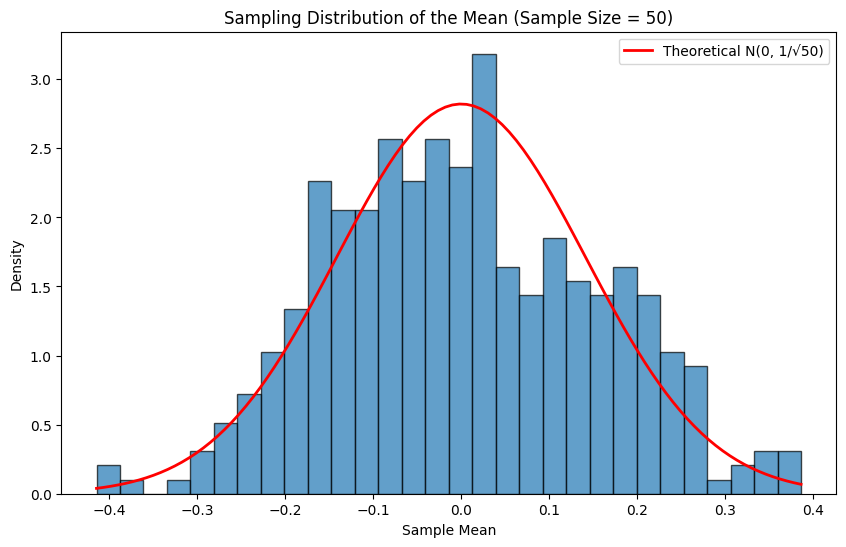

In [29]:
plt.figure(figsize=(10, 6))
plt.hist(daily_means_50, bins=30, density=True, edgecolor='black', alpha=0.7)
x = np.linspace(min(daily_means_50), max(daily_means_50), 100)
plt.plot(x, norm.pdf(x, loc=0, scale=theoretical_se_50), 'r-', lw=2, label='Theoretical N(0, 1/√50)')
plt.title("Sampling Distribution of the Mean (Sample Size = 50)")
plt.xlabel("Sample Mean")
plt.ylabel("Density")
plt.legend()
plt.show()

What we've seen so far, then, is that we can estimate population parameters from a sample from the population, and that samples have their own distributions. Furthermore, the larger the sample size, the narrower are those sampling distributions.

### Normally testing time!

All of the above is well and good. We've been sampling from a population we know is normally distributed, we've come to understand when to use $n$ and when to use $n-1$ in the denominator to calculate the spread of a distribution, and we've  seen the Central Limit Theorem in action for a sampling distribution. All seems very well behaved in Frequentist land. But, well, why should we really care?

Remember, we rarely (if ever) actually know our population parameters but we still have to estimate them somehow. If we want to make inferences to conclusions like "this observation is unusual" or "my population mean has changed" then we need to have some idea of what the underlying distribution is so we can calculate relevant probabilities. In frequentist inference, we use the formulae above to deduce these population parameters. Take a moment in the next part of this assignment to refresh your understanding of how these probabilities work.

Recall some basic properties of the standard normal distribution, such as that about 68% of observations are within plus or minus 1 standard deviation of the mean. Check out the precise definition of a normal distribution on p. 394 of *AoS*.

__Q11:__ Using this fact, calculate the probability of observing the value 1 or less in a single observation from the standard normal distribution. Hint: you may find it helpful to sketch the standard normal distribution (the familiar bell shape) and mark the number of standard deviations from the mean on the x-axis and shade the regions of the curve that contain certain percentages of the population.

__A:__  Using the cumulative distribution function (CDF) of the standard normal distribution, we find that the probability of observing a value less than or equal to 1 is approximately 0.8413. This means that about 84.13% of observations lie to the left of 1, and thus, values of 1 or less are quite common in a standard normal distribution. This aligns with the known fact that roughly 68% of values lie within ±1 standard deviation, and values between -∞ and 1 capture more than two-thirds of the distribution.

Calculating this probability involved calculating the area under the curve from the value of 1 and below. To put it in mathematical terms, we need to *integrate* the probability density function. We could just add together the known areas of chunks (from -Inf to 0 and then 0 to $+\sigma$ in the example above). One way to do this is to look up tables (literally). Fortunately, scipy has this functionality built in with the cdf() function.

__Q12:__ Use the cdf() function to answer the question above again and verify you get the same answer.

__A:__  Using the cdf() function confirms our previous result: the probability of observing a value ≤ 1 in a standard normal distribution is approximately 0.8413. This verifies the calculation and illustrates how the cumulative distribution function is used in frequentist inference to compute probabilities for normally distributed data.

In [30]:
prob_cdf = norm.cdf(1)

print("Using cdf(): P(X ≤ 1) =", prob_cdf)

Using cdf(): P(X ≤ 1) = 0.8413447460685429


__Q13:__ Using our knowledge of the population parameters for our townsfolks' heights, what is the probability of selecting one person at random and their height being 177 cm or less? Calculate this using both of the approaches given above.



__A:__  we find that the probability of selecting one person with a height of 177 cm or less is approximately 0.8413. This confirms that 84.13% of people in the population are expected to be 177 cm or shorter.

In [31]:
z = (177 - 172) / 5
prob_z = norm.cdf(z)
print("Approach 1 - Using z-score: P(X ≤ 177) =", prob_z)

Approach 1 - Using z-score: P(X ≤ 177) = 0.8413447460685429


__Q14:__ Turning this question around — suppose we randomly pick one person and measure their height and find they are 2.00 m tall. How surprised should we be at this result, given what we know about the population distribution? In other words, how likely would it be to obtain a value at least as extreme as this? Express this as a probability.

__A:__ Given the population mean of 172 cm and a standard deviation of 5 cm, the probability of observing someone who is 200 cm or taller is approximately 1.07 × 10⁻⁸. This means such a height is extremely rare and would be considered highly unusual in this population. Seeing a value this extreme would strongly suggest that the person is an outlier or possibly from a different population distribution

In [32]:
z = (200 - 172) / 5
prob = 1 - norm.cdf(z)

# Alternatively, directly using population mean and std
prob_direct = norm.sf(200, loc=172, scale=5)

print("P(X ≥ 200) using 1 - cdf:", prob)
print("P(X ≥ 200) using sf():", prob_direct)

P(X ≥ 200) using 1 - cdf: 1.0717590259723409e-08
P(X ≥ 200) using sf(): 1.0717590258310887e-08


What we've just done is calculate the ***p-value*** of the observation of someone 2.00m tall (review *p*-values if you need to on p. 399 of *AoS*). We could calculate this probability by virtue of knowing the population parameters. We were then able to use the known properties of the relevant normal distribution to calculate the probability of observing a value at least as extreme as our test value.

We're about to come to a pinch, though. We've said a couple of times that we rarely, if ever, know the true population parameters; we have to estimate them from our sample and we cannot even begin to estimate the standard deviation from a single observation.

This is very true and usually we have sample sizes larger than one. This means we can calculate the mean of the sample as our best estimate of the population mean and the standard deviation as our best estimate of the population standard deviation.

In other words, we are now coming to deal with the sampling distributions we mentioned above as we are generally concerned with the properties of the sample means we obtain.

Above, we highlighted one result from the CLT, whereby the sampling distribution (of the mean) becomes narrower and narrower with the square root of the sample size. We remind ourselves that another result from the CLT is that _even if the underlying population distribution is not normal, the sampling distribution will tend to become normal with sufficiently large sample size_. (**Check out p. 199 of AoS if you need to revise this**). This is the key driver for us 'requiring' a certain sample size, for example you may frequently see a minimum sample size of 30 stated in many places. In reality this is simply a rule of thumb; if the underlying distribution is approximately normal then your sampling distribution will already be pretty normal, but if the underlying distribution is heavily skewed then you'd want to increase your sample size.

__Q15:__ Let's now start from the position of knowing nothing about the heights of people in our town.
* Use the random seed of 47, to randomly sample the heights of 50 townsfolk
* Estimate the population mean using np.mean
* Estimate the population standard deviation using np.std (remember which denominator to use!)
* Calculate the (95%) [margin of error](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/hypothesis-testing/margin-of-error/#WhatMofE) (use the exact critial z value to 2 decimal places - [look this up](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/find-critical-values/) or use norm.ppf()) Recall that the ***margin of error*** is mentioned on p. 189 of the *AoS* and discussed in depth in that chapter).
* Calculate the 95% Confidence Interval of the mean (***confidence intervals*** are defined on p. 385 of *AoS*)
* Does this interval include the true population mean?

__A:__Using a random sample of 50 townsfolk with seed 47, we estimated the population mean height to be 171.094 cm and the sample standard deviation as 4.868 cm. Using a z-critical value of 1.96 for a 95% confidence level, we calculated a margin of error of 1.349 cm, resulting in a 95% confidence interval of (169.745 cm, 172.444 cm). Since the true population mean of 172 cm lies within this interval, we can say that our estimate is consistent with the true mean.

In [33]:
seed(47)
# take your sample now
np.random.seed(47)
sample = np.random.normal(loc=172, scale=5, size=50)

In [34]:
# Step 2: Estimate the population mean using the sample
sample_mean = np.mean(sample)

# Step 3: Estimate the sample standard deviation (use Bessel's correction)
sample_std = np.std(sample, ddof=1)


In [35]:
# Step 4: Calculate the margin of error (95% confidence level)
z_critical = norm.ppf(0.975)  # z-value for 95% CI
margin_of_error = z_critical * (sample_std / np.sqrt(len(sample)))

# Step 5: Calculate the confidence interval
ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error


In [36]:
# Step 6: Check if the true population mean is within the interval
true_mean = 172
includes_true_mean = ci_lower <= true_mean <= ci_upper

# Output
print("Sample Mean:", round(sample_mean, 3))
print("Sample Std Dev:", round(sample_std, 3))
print("Z-critical value:", round(z_critical, 2))
print("Margin of Error:", round(margin_of_error, 3))
print(f"95% Confidence Interval: ({round(ci_lower, 3)}, {round(ci_upper, 3)})")
print("Does this interval include the true mean (172 cm)?", includes_true_mean)


Sample Mean: 171.094
Sample Std Dev: 4.868
Z-critical value: 1.96
Margin of Error: 1.349
95% Confidence Interval: (169.745, 172.444)
Does this interval include the true mean (172 cm)? True


__Q16:__ Above, we calculated the confidence interval using the critical z value. What is the problem with this? What requirement, or requirements, are we (strictly) failing?

__A:__ The problem with using the z-critical value is that it assumes we know the population standard deviation, which we don’t. In Q15, we estimated it from the sample. When the population standard deviation is unknown, we are strictly required to use the t-distribution, not the z-distribution. This ensures a more accurate confidence interval, especially with smaller sample sizes.

__Q17:__ Calculate the 95% confidence interval for the mean using the _t_ distribution. Is this wider or narrower than that based on the normal distribution above? If you're unsure, you may find this [resource](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/confidence-interval/) useful. For calculating the critical value, remember how you could calculate this for the normal distribution using norm.ppf().

__A:__ Using the t-distribution with 49 degrees of freedom, we get a t-critical value of approximately 2.009, slightly higher than the z-value of 1.96. This results in a margin of error of about 1.381, producing a 95% confidence interval of (169.713, 172.475). This interval is slightly wider than the one based on the normal distribution, reflecting the increased uncertainty when estimating the standard deviation from the sample.

In [38]:
# Sample size and degrees of freedom
n = len(sample)
df = n - 1

# 95% confidence level → two-tailed → 0.975
t_critical = t.ppf(0.975, df)

In [39]:
# Margin of error using t-distribution
margin_of_error_t = t_critical * (sample_std / np.sqrt(n))


In [40]:
# Confidence interval using t-distribution
ci_lower_t = sample_mean - margin_of_error_t
ci_upper_t = sample_mean + margin_of_error_t

# Output
print("T-critical value:", round(t_critical, 3))
print("Margin of Error (t):", round(margin_of_error_t, 3))
print("95% Confidence Interval using t-distribution: ({:.3f}, {:.3f})".format(ci_lower_t, ci_upper_t))


T-critical value: 2.01
Margin of Error (t): 1.384
95% Confidence Interval using t-distribution: (169.711, 172.478)


This is slightly wider than the previous confidence interval. This reflects the greater uncertainty given that we are estimating population parameters from a sample.

## 4. Learning outcomes

Having completed this project notebook, you now have hands-on experience:
* sampling and calculating probabilities from a normal distribution
* identifying the correct way to estimate the standard deviation of a population (the population parameter) from a sample
* with sampling distribution and now know how the Central Limit Theorem applies
* with how to calculate critical values and confidence intervals